# Análisis de Turismo en Mendoza
## Datos: mendoza_turismo_final_mensual_por_pais.csv

### Objetivo
Explorar, graficar y generar hipótesis relevantes sobre el turismo en Mendoza usando los datos mensuales y anuales por país, precios, intereses y estacionalidades.

In [2]:
# Instalar librerías
!pip install matplotlib seaborn pandas numpy --quiet

In [3]:
# Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Estilo de gráficos
sns.set(style="whitegrid")

In [6]:
# Cargar el archivo CSV
df = pd.read_csv("mendoza_turismo_final_mensual_por_pais.csv", sep=';')
df.head()

,indice_tiempo,pais_origen,turistas,precio_promedio_usd,precio_minimo_usd,precio_maximo_usd,dias,variacion_usd_mensual,variacion_porcentual_usd,usd_alto,...,es_junio,es_julio,es_agosto,es_septiembre,es_octubre,es_noviembre,es_diciembre,mes_vendimia,vacaciones_invierno,temporada_alta
0,2014-01,Brasil,654,7.1,6.0,8.0,31,2.0,33.33,0,...,0,0,0,0,0,0,0,0,0,1
1,2014-01,Chile,1046,7.1,6.0,8.0,31,2.0,33.33,0,...,0,0,0,0,0,0,0,0,0,1
2,2014-01,"Ee.Uu, Canadá Y México",1211,7.1,6.0,8.0,31,2.0,33.33,0,...,0,0,0,0,0,0,0,0,0,1
3,2014-01,Europa Y Resto Del Mundo,719,7.1,6.0,8.0,31,2.0,33.33,0,...,0,0,0,0,0,0,0,0,0,1
4,2014-01,Resto De América,763,7.1,6.0,8.0,31,2.0,33.33,0,...,0,0,0,0,0,0,0,0,0,1


## Hipótesis 1: ¿Existe estacionalidad marcada en la llegada de turistas?
### Hipótesis: Los meses de enero, julio y diciembre concentran la mayor cantidad de turistas, coincidiendo con vacaciones y temporada alta.

C:\Users\Julyc\AppData\Local\Temp\ipykernel_16452\3213775186.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=turistas_mes.index, y=turistas_mes.values, palette="viridis")


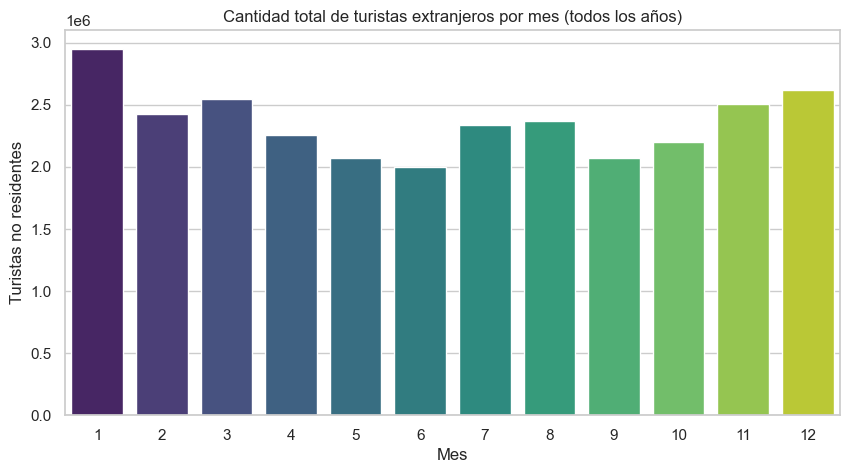

In [10]:
# Agrupar por mes y sumar turistas
turistas_mes = df.groupby('mes')['turistas'].sum()
plt.figure(figsize=(10,5))
sns.barplot(x=turistas_mes.index, y=turistas_mes.values, palette="viridis")
plt.title('Cantidad total de turistas extranjeros por mes (todos los años)')
plt.xlabel('Mes')
plt.ylabel('Turistas no residentes')
plt.show()

## Hipótesis 2: ¿Qué países generan mayor turismo en Mendoza y cómo ha cambiado?
### Hipótesis: Chile y Brasil son los principales mercados, pero la proporción ha variado con el tiempo.

C:\Users\Julyc\AppData\Local\Temp\ipykernel_16452\2366079447.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_paises.values, y=top_paises.index, palette="magma")


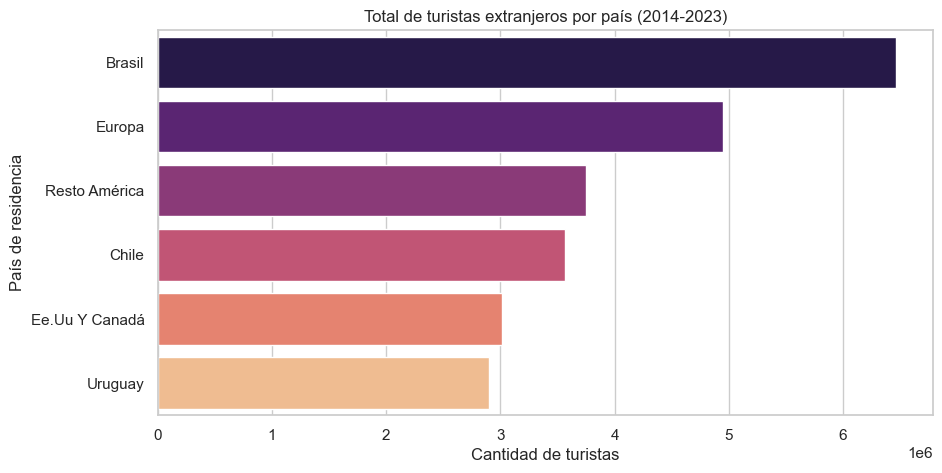

In [14]:
# Top países por cantidad de turistas
top_paises = df.groupby('pais_origen')['turistas'].sum().sort_values(ascending=False).head(6)
plt.figure(figsize=(10,5))
sns.barplot(x=top_paises.values, y=top_paises.index, palette="magma")
plt.title('Total de turistas extranjeros por país (2014-2023)')
plt.xlabel('Cantidad de turistas')
plt.ylabel('País de residencia')
plt.show()

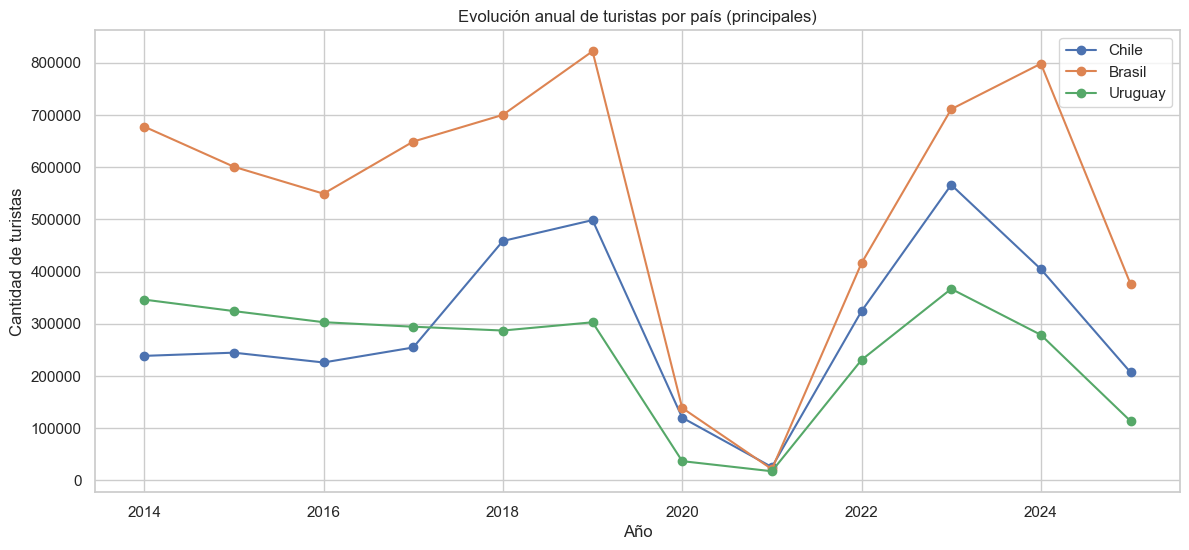

In [17]:
# Evolución de turistas de Chile vs Brasil vs Uruguay (los 3 más importantes)
plt.figure(figsize=(14,6))
for pais in ['Chile', 'Brasil', 'Uruguay']:
    datos = df[df['pais_origen']==pais].groupby('año')['turistas'].sum()
    plt.plot(datos.index, datos.values, marker='o', label=pais)
plt.legend()
plt.title('Evolución anual de turistas por país (principales)')
plt.xlabel('Año')
plt.ylabel('Cantidad de turistas')
plt.show()

## Hipótesis 3: ¿La variabilidad del precio y el interés de Google afectan la afluencia turística?
### Hipótesis: Los meses con mayor variabilidad de precios o mayor interés en Google coinciden con picos turísticos.

In [18]:
# Relación entre interés Google promedio y cantidad de turistas mensuales
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['interes_google_promedio'], y=df['turistas_no_residentes_total'], alpha=0.3)
plt.title('Interés Google vs Cantidad de turistas (mensual, todos los países)')
plt.xlabel('Interés Google Promedio')
plt.ylabel('Turistas no residentes')
plt.show()

KeyError: 'turistas_no_residentes_total'

<Figure size 800x500 with 0 Axes>

In [7]:
# Análisis de meses con alta variabilidad de precios
df['usd_alta_variabilidad'] = df['usd_alta_variabilidad'].astype(int)
plt.figure(figsize=(8,5))
sns.boxplot(x='usd_alta_variabilidad', y='turistas_no_residentes_total', data=df)
plt.title('Turistas según variabilidad alta del precio (0: baja, 1: alta)')
plt.xlabel('Alta variabilidad USD')
plt.ylabel('Turistas no residentes')
plt.show()

## Hipótesis 4: ¿Las vacaciones y eventos impactan el turismo?
### Hipótesis: Los meses de vacaciones (invierno y verano) y la Vendimia muestran picos en la llegada de turistas.

In [8]:
# Efecto vacaciones de invierno y Vendimia
df['vacaciones_invierno'] = df['vacaciones_invierno'].astype(int)
df['mes_vendimia'] = df['mes_vendimia'].astype(int)

plt.figure(figsize=(8,5))
sns.boxplot(x='vacaciones_invierno', y='turistas_no_residentes_total', data=df)
plt.title('Turistas en meses de vacaciones de invierno')
plt.xlabel('Vacaciones de invierno (0: No, 1: Sí)')
plt.ylabel('Turistas no residentes')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='mes_vendimia', y='turistas_no_residentes_total', data=df)
plt.title('Turistas en meses de la Vendimia')
plt.xlabel('Mes Vendimia (0: No, 1: Sí)')
plt.ylabel('Turistas no residentes')
plt.show()

# Resumen de hipótesis
1. **Estacionalidad:** Se espera observar mayor afluencia turística en enero, julio y diciembre.
2. **Mercados principales:** Chile, Brasil y Uruguay son los países más relevantes, pero hay variaciones temporales.
3. **Precio/interés:** La variabilidad de precios y el interés en Google pueden correlacionar con los picos turísticos.
4. **Eventos y vacaciones:** Las vacaciones y la Vendimia tienen impacto positivo en la llegada de turistas.

## Próximos pasos
- Analizar otras variables cruzadas.
- Realizar regresiones o modelos para cuantificar el impacto de las variables.
- Explorar los efectos de la pandemia COVID-19 y la recuperación posterior.
- Profundizar en diferencias entre países o regiones.